In [1]:
import csv
import pandas as pd

/home/pranjal/.local/share/virtualenvs/crime-analysis-report-pk3Cf-oK/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
## Removes TOTAL from records

path = './dataset/DM_Dataset-T12.csv'
csv_reader = csv.reader(open(path, 'r'))
all_records = []
header = []

for idx,record in enumerate(csv_reader):
    if idx == 0:
        header = [data.lower() for data in record]
    elif 'total' not in record[1].lower():
        all_records.append([data.lower() for data in record])

df = pd.DataFrame(all_records, columns=header)
for column in header[3:]:
    df[column] = df[column].apply(pd.to_numeric, errors='coerce')
df.drop(['infanticide', 'literacy rate- total', 'literacy rate - rural', 'literacy rate - urban'], axis=1, inplace=True)

In [3]:
# df.head(),
df.state.unique()

array(['andhra pradesh', 'arunachal pradesh', 'assam', 'bihar',
       'chhattisgarh', 'goa', 'gujarat', 'haryana', 'himachal pradesh',
       'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala',
       'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'odisha', 'punjab', 'rajasthan', 'sikkim',
       'tamil nadu', 'tripura', 'uttar pradesh', 'uttarakhand',
       'west bengal', 'a & n islands', 'chandigarh', 'd & n haveli',
       'daman & diu', 'delhi', 'lakshadweep', 'puducherry', 'a&n islands',
       'd&n haveli', 'delhi ut', 'telangana'], dtype=object)

In [4]:
for i in range (len(df)):
    if df.loc[i, ('state')] == 'a & n islands': df.loc[i, ('state')] = 'a&n islands'
    if df.loc[i, ('state')] == 'd & n haveli': df.loc[i, ('state')] = 'd&n haveli'
    if df.loc[i, ('state')] == 'delhi ut': df.loc[i, ('state')] = 'delhi'
len(df.state.unique())

36

In [5]:
state_clubbed = []
state_index = 0
state = 0

while state_index < len(df):
    state = df['state'].loc[state_index]
    year = df['year'].loc[state_index]
    dist_index = state_index
    while dist_index < len(df) and df['state'].loc[dist_index] == state:
        dist_index += 1
    temp = df.iloc[state_index : dist_index].drop(['state', 'district', 'year'], axis=1).sum().to_list()
    temp.insert(0,state)
    temp.insert(1,int(year))
    state_clubbed.append(temp)
    
    state_index = dist_index
        

In [6]:
state_df = pd.DataFrame(state_clubbed, columns=['state', 'year', 'murder', 'rape', 'foeticide', 'kidnapping and abduction',
                                              'abetment of suicide', 'exposure and abandonment', 'procuration of minor girls',
                                              'selling girls for prostitution', 'prohibition of child marriage act',
                                              'other crimes', 'total'])

In [7]:
state_df.dtypes
state_df.head()

,state,year,murder,rape,foeticide,kidnapping and abduction,abetment of suicide,exposure and abandonment,procuration of minor girls,selling girls for prostitution,prohibition of child marriage act,other crimes,total
0,andhra pradesh,2001,35.0,84.0,0.0,57.0,7.0,22.0,12.0,0.0,6.0,47.0,270.0
1,arunachal pradesh,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,assam,2001,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
3,bihar,2001,2.0,16.0,0.0,26.0,0.0,1.0,16.0,1.0,2.0,18.0,83.0
4,chhattisgarh,2001,14.0,150.0,5.0,46.0,1.0,15.0,0.0,0.0,0.0,354.0,585.0


In [8]:
df.to_pickle('state_df.pickle')

## Plot of Total Crimes Yearwise (2001-2015)

In [9]:
from matplotlib import pyplot

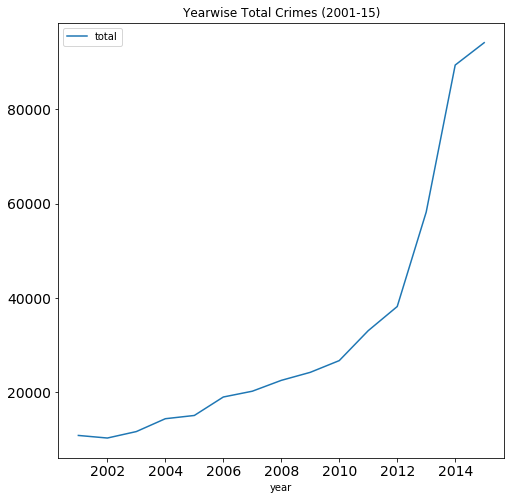

In [10]:
total_crime_yearwise = state_df.loc[:,('year', 'total')]

total_crime_yearwise.groupby('year').sum().plot(y='total', kind='line', fontsize=14, 
                                                 title="Yearwise Total Crimes (2001-15)", figsize=(8,8))

In [11]:
import seaborn as sns
import matplotlib as plt

In [12]:
headers = ['murder', 'rape', 'foeticide', 'kidnapping and abduction',
            'abetment of suicide', 'exposure and abandonment', 'procuration of minor girls',
            'selling girls for prostitution', 'prohibition of child marriage act',]

In [13]:
sum_crimewise = state_df.drop(["state", "total", "other crimes"],
                              axis=1, inplace=False).groupby('year').sum()
sum_crimewise

,murder,rape,foeticide,kidnapping and abduction,abetment of suicide,exposure and abandonment,procuration of minor girls,selling girls for prostitution,prohibition of child marriage act
year,,,,,,,,,
2001,1149.0,2120.0,55.0,2849.0,26.0,686.0,139.0,10.0,83.0
2002,1175.0,2376.0,84.0,2282.0,24.0,644.0,124.0,5.0,113.0
2003,1315.0,2949.0,57.0,2571.0,25.0,722.0,171.0,36.0,63.0
2004,1405.0,3520.0,86.0,3167.0,33.0,715.0,205.0,19.0,93.0
2005,1351.0,4063.0,86.0,3531.0,43.0,933.0,145.0,50.0,122.0
2006,1450.0,4721.0,125.0,5102.0,45.0,909.0,231.0,123.0,99.0
2007,1503.0,5008.0,96.0,6236.0,26.0,922.0,253.0,69.0,96.0
2008,1436.0,5446.0,73.0,7650.0,29.0,864.0,224.0,49.0,104.0
2009,1551.0,5368.0,123.0,8945.0,46.0,857.0,237.0,57.0,5.0


## Crime Wise Graph from (2001-15)

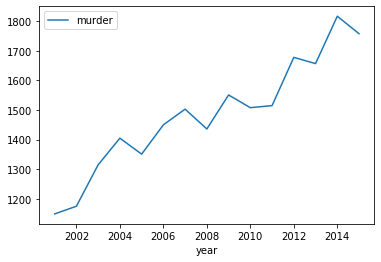

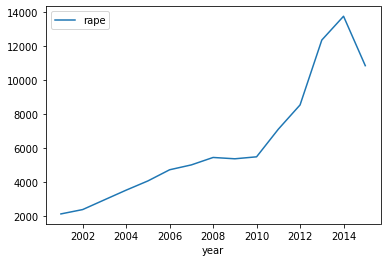

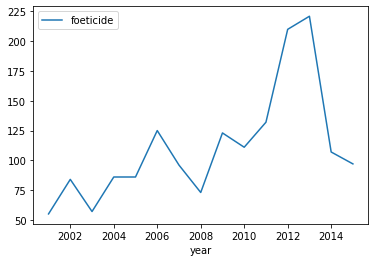

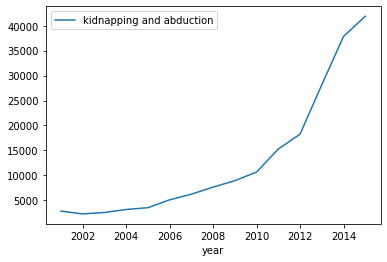

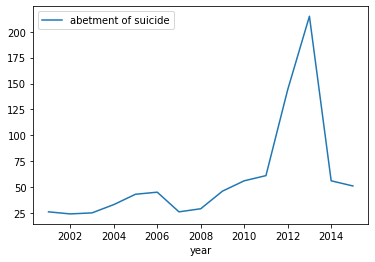

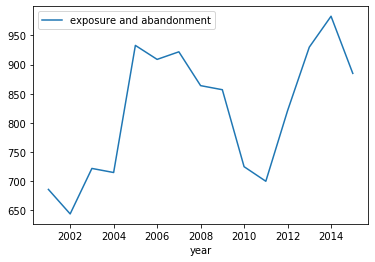

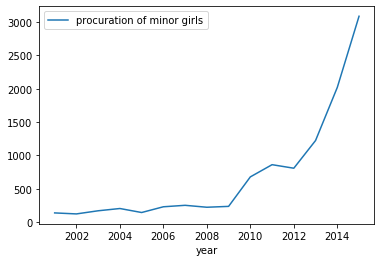

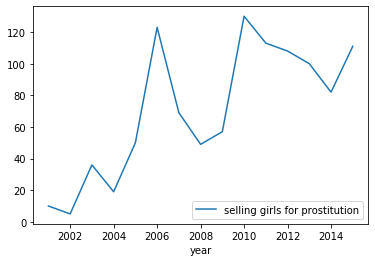

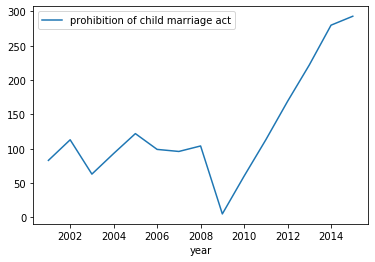

In [14]:
for crime in headers:
    crime_df = state_df.loc[:, ('state', 'year', crime)].groupby('year').sum()
    crime_df.plot()

In [15]:
state_df.drop(['year','total', 'other crimes'], axis=1).corr()

,murder,rape,foeticide,kidnapping and abduction,abetment of suicide,exposure and abandonment,procuration of minor girls,selling girls for prostitution,prohibition of child marriage act
murder,1.000000,0.602302,0.311138,0.524554,0.365492,0.384295,0.049101,0.030914,0.264261
rape,0.602302,1.000000,0.619969,0.683703,0.491751,0.567499,0.020998,0.035763,0.278366
foeticide,0.311138,0.619969,1.000000,0.305716,0.351222,0.469243,-0.020892,-0.013194,0.140500
kidnapping and abduction,0.524554,0.683703,0.305716,1.000000,0.326185,0.276096,0.132501,0.114830,0.233544
abetment of suicide,0.365492,0.491751,0.351222,0.326185,1.000000,0.280254,0.045530,0.081104,0.176690
exposure and abandonment,0.384295,0.567499,0.469243,0.276096,0.280254,1.000000,-0.007045,-0.015593,0.362331
procuration of minor girls,0.049101,0.020998,-0.020892,0.132501,0.045530,-0.007045,1.000000,0.481608,0.349198
selling girls for prostitution,0.030914,0.035763,-0.013194,0.114830,0.081104,-0.015593,0.481608,1.000000,0.280841
prohibition of child marriage act,0.264261,0.278366,0.140500,0.233544,0.176690,0.362331,0.349198,0.280841,1.000000


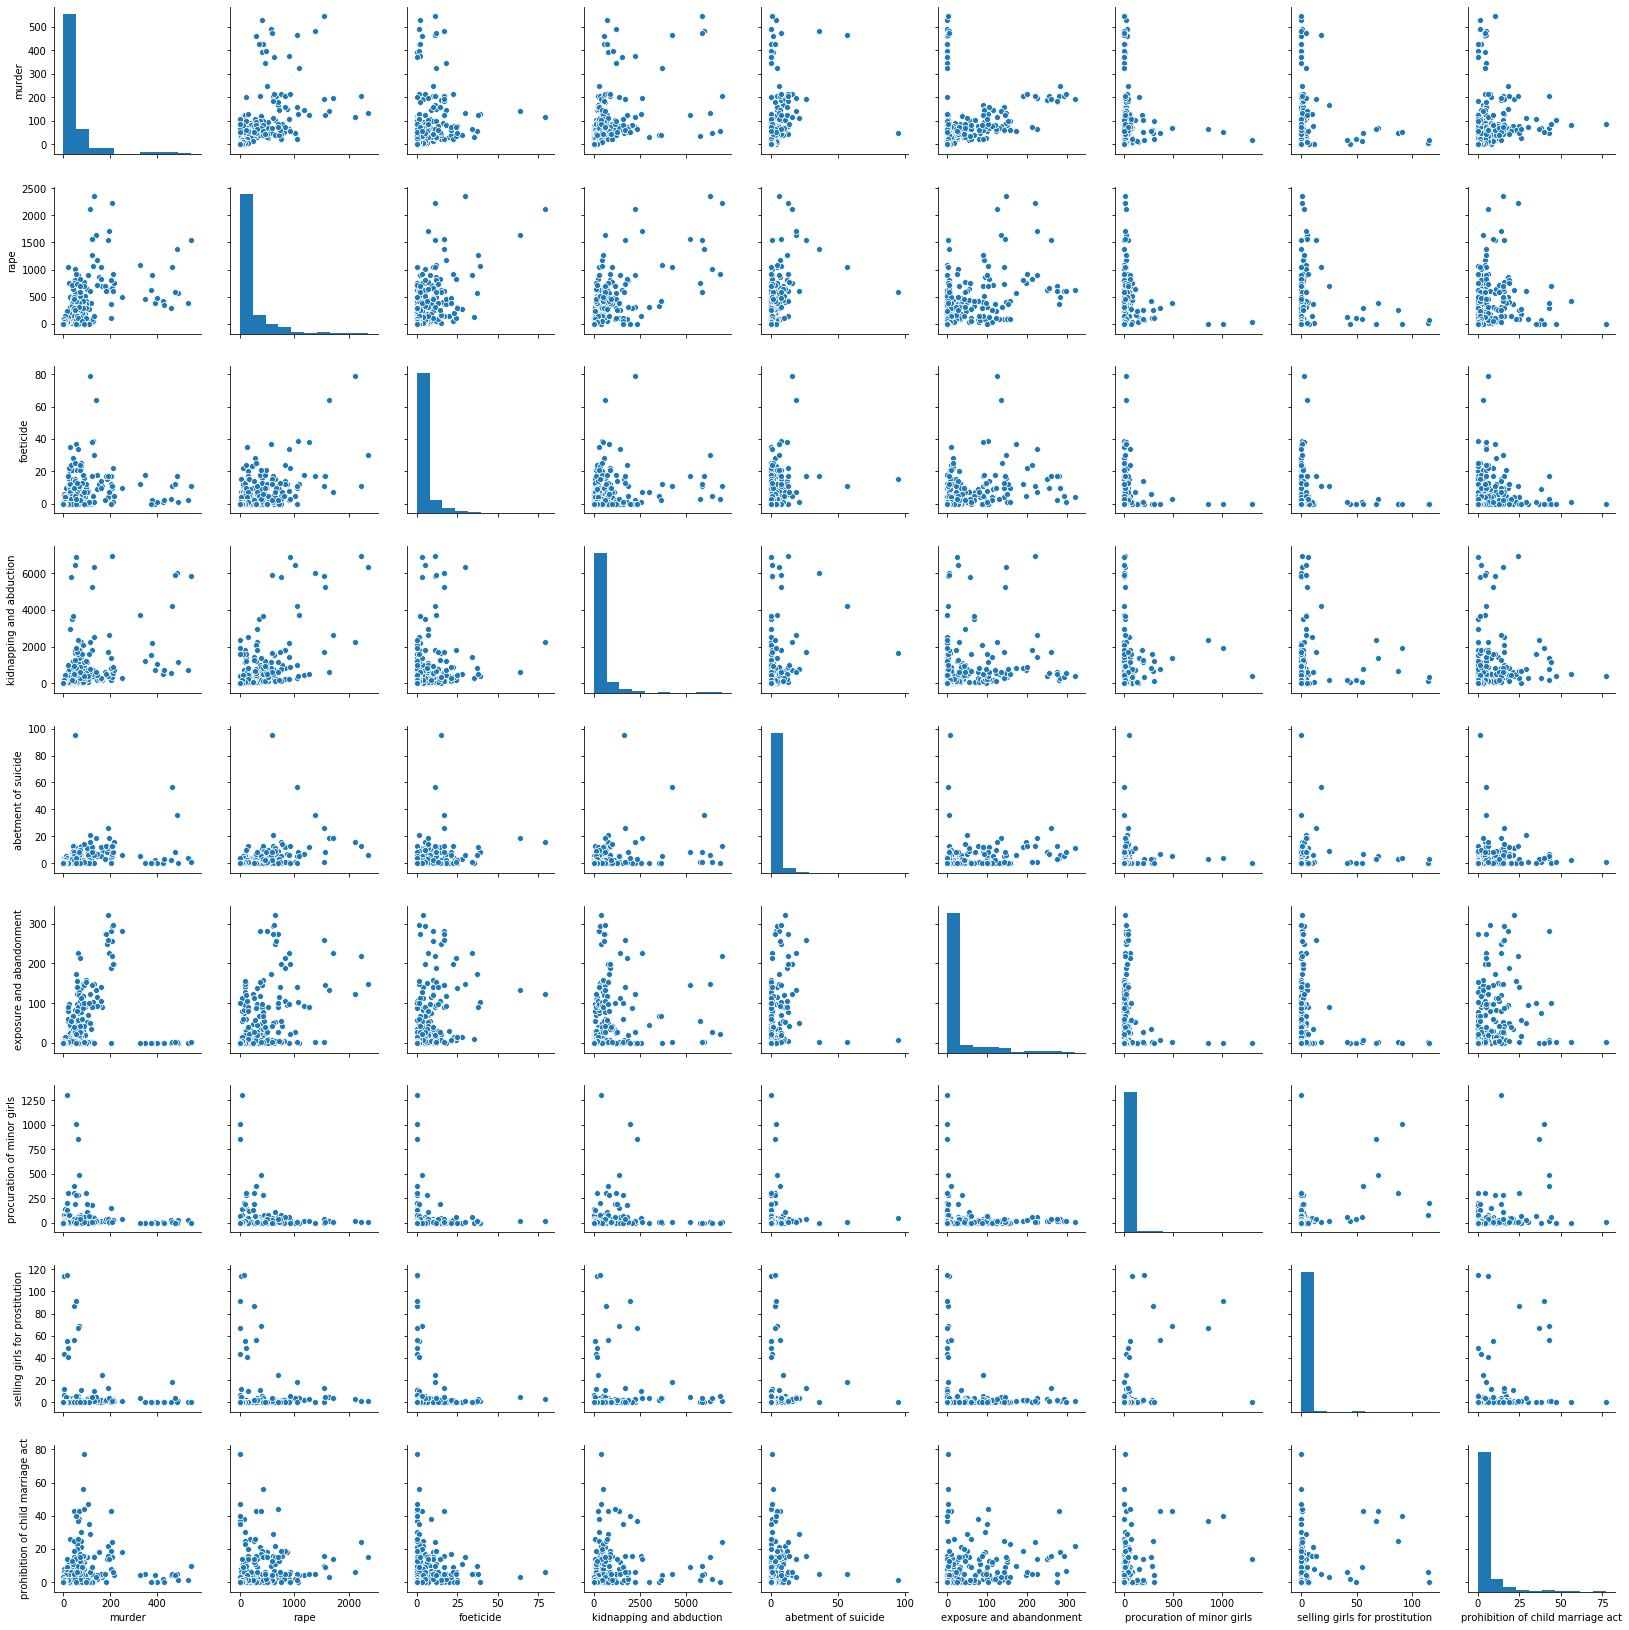

In [16]:
sns.pairplot(state_df.drop(['year','total', 'other crimes'], axis=1))

## State's contribution in crimes over the years 

In [45]:
total_crimes_statewise = state_df.loc[:, ('state','total')].groupby('state').sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f46eff120d0>],
      dtype=object)

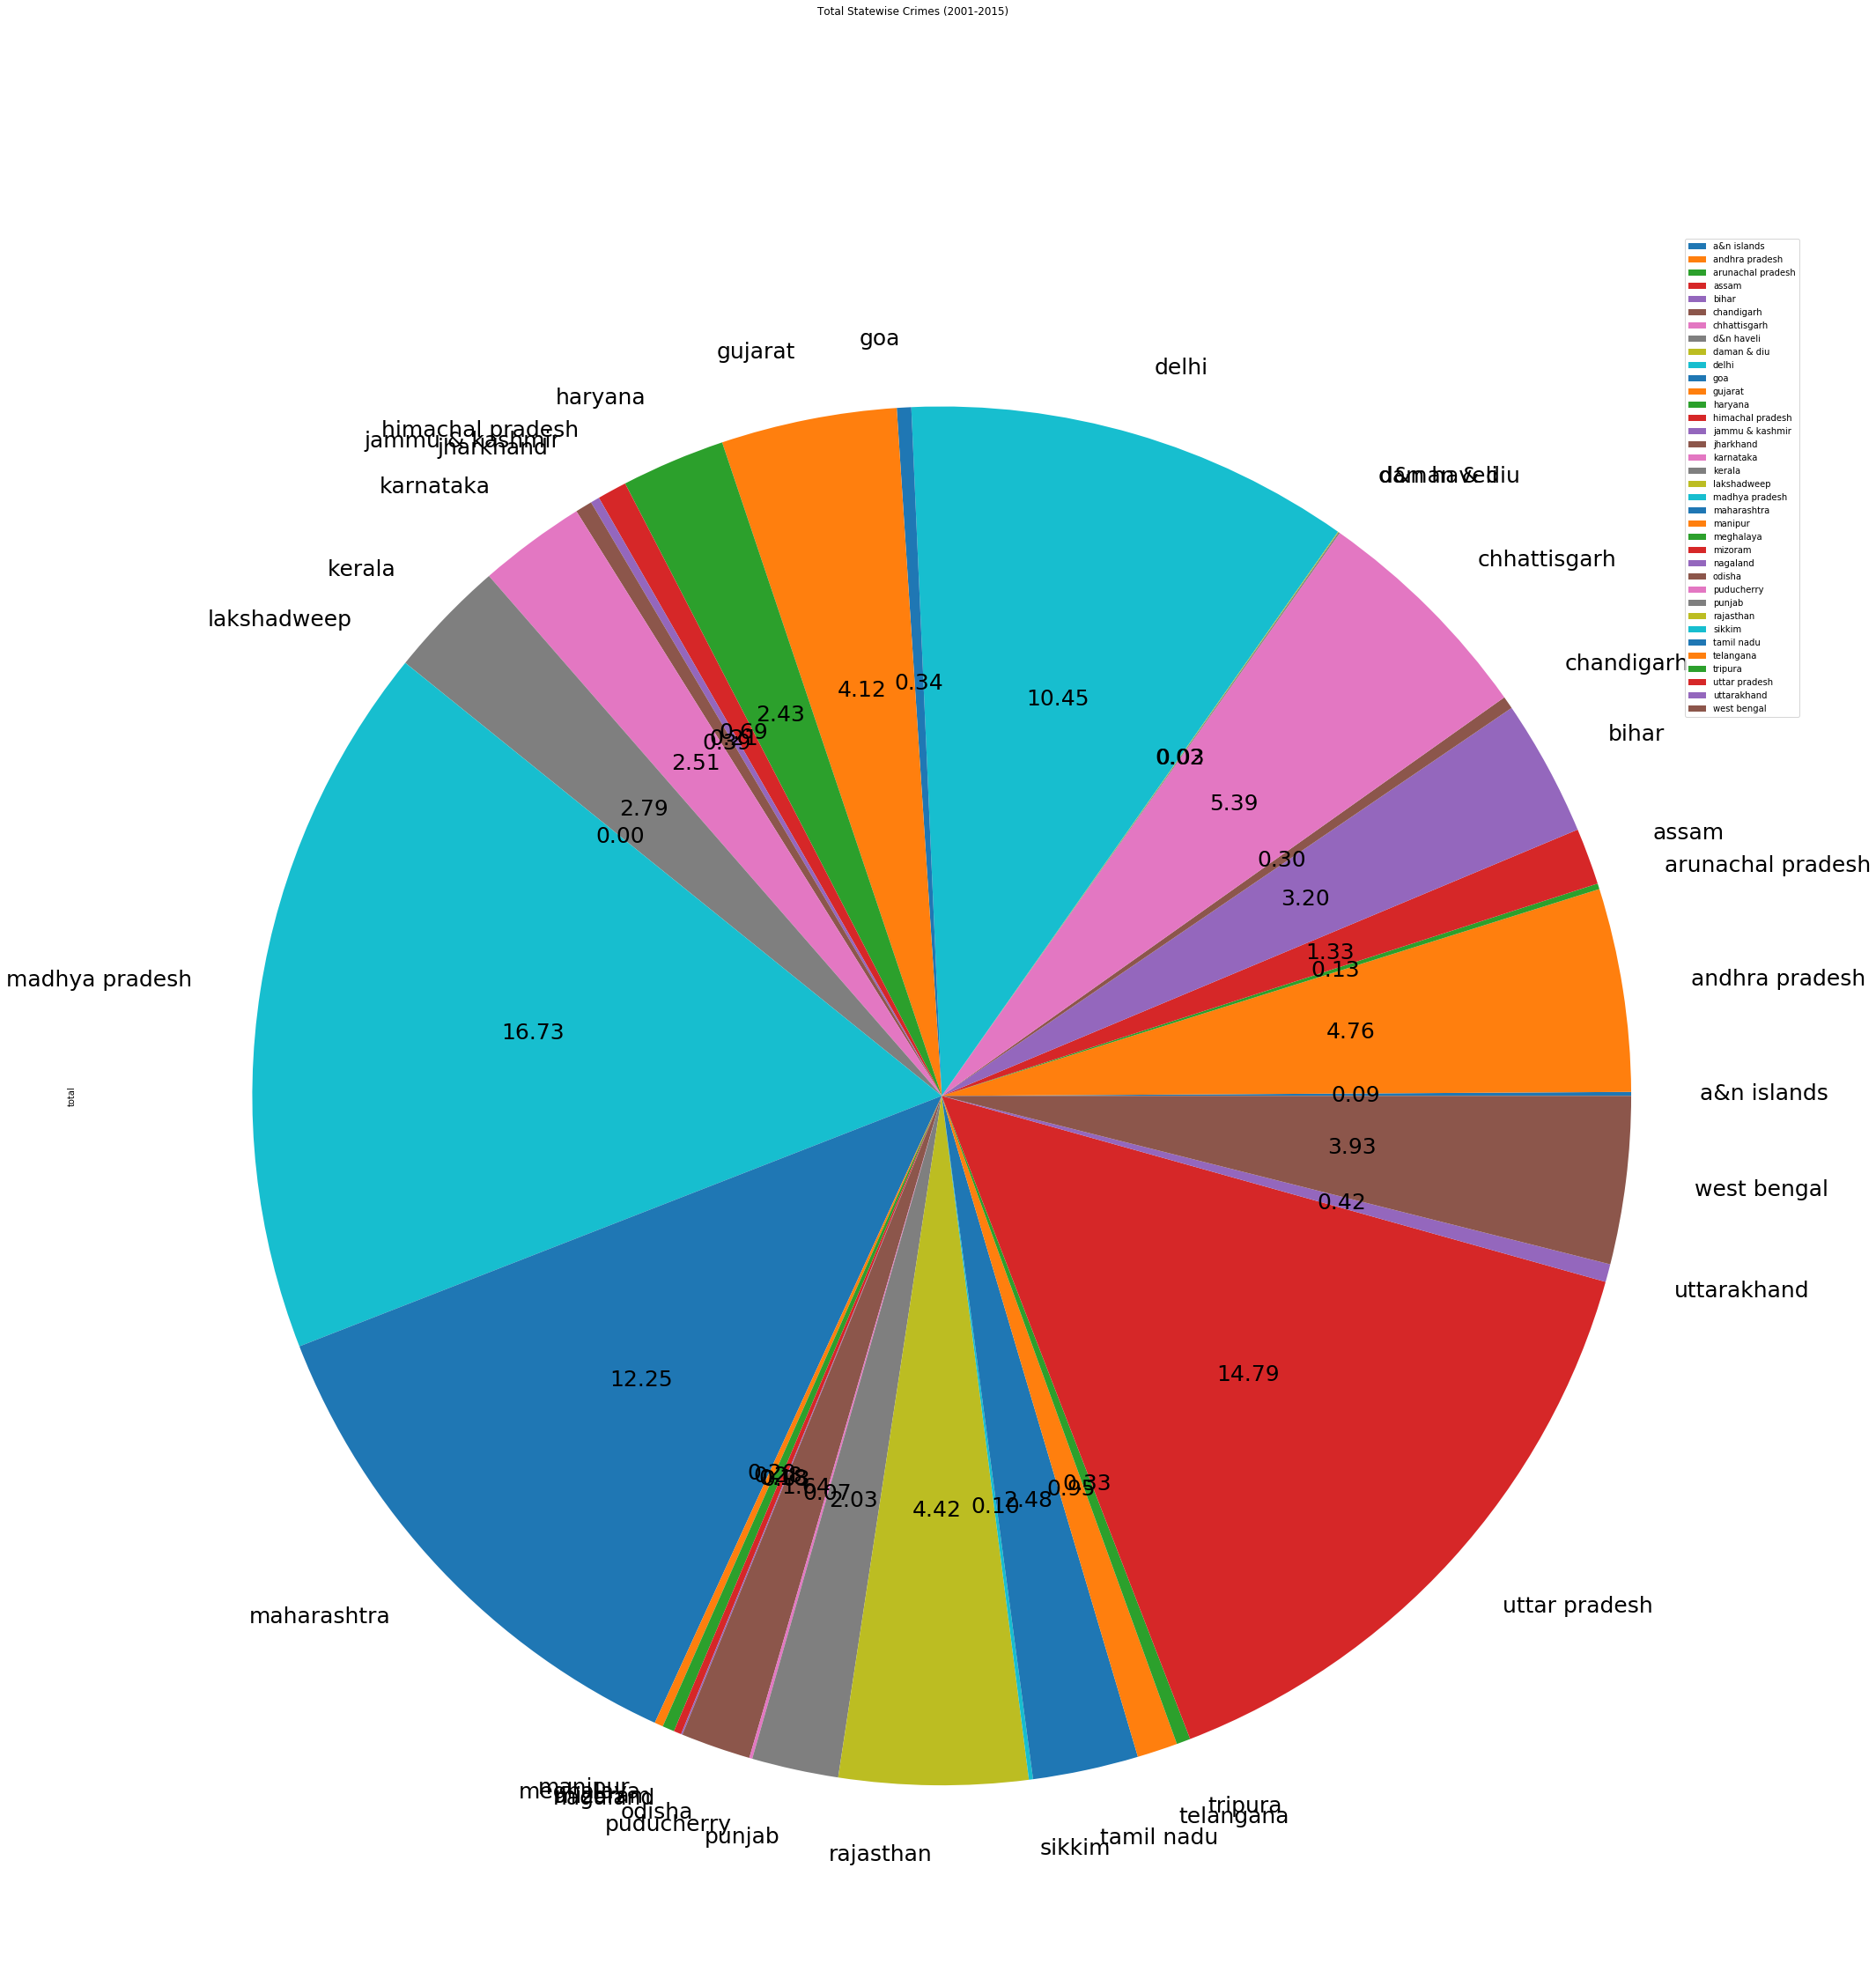

In [46]:
total_crimes_statewise.plot(subplots=True, kind='pie', title='Total Statewise Crimes (2001-2015)', 
                            fontsize=25, figsize=(36,36), autopct='%.2f')

,state,year,murder,rape,foeticide,kidnapping and abduction,abetment of suicide,exposure and abandonment,procuration of minor girls,selling girls for prostitution,prohibition of child marriage act,other crimes,total
0,andhra pradesh,2001,35.0,84.0,0.0,57.0,7.0,22.0,12.0,0.0,6.0,47.0,270.0
1,arunachal pradesh,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,assam,2001,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
3,bihar,2001,2.0,16.0,0.0,26.0,0.0,1.0,16.0,1.0,2.0,18.0,83.0
4,chhattisgarh,2001,14.0,150.0,5.0,46.0,1.0,15.0,0.0,0.0,0.0,354.0,585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,d&n haveli,2015,2.0,2.0,0.0,14.0,0.0,2.0,0.0,0.0,0.0,2.0,35.0
523,daman & diu,2015,1.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
524,delhi,2015,54.0,927.0,3.0,6881.0,0.0,23.0,0.0,6.0,0.0,231.0,9489.0
525,lakshadweep,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
